In [1]:
import numpy as np
import pandas as pd
# !pip install TA-lib
#!pip install TA-Lib-binary
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib
import talib
#import talib
import yfinance as yf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   2516      0 --:--:-- --:--:-- --:--:--  2516
100   353  100   353    0     0   1196      0 --:--:-- --:--:-- --:--:--  1196
100 1299k  100 1299k    0     0  2279k      0 --:--:-- --:--:-- --:--:-- 8110k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [2]:
# Define start and end dates
start_date = '2018-04-01'
end_date = '2023-03-31'

# Download stock data for Tata Motors Ltd
ticker = 'TATAMOTORS.NS'  # Yahoo Finance ticker symbol for Tata Motors
data = yf.download(ticker, start=start_date, end=end_date)

# Display the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-04-02  335.000000  340.799988  332.700012  339.149994  339.149994   
2018-04-03  338.399994  344.500000  337.149994  343.100006  343.100006   
2018-04-04  346.799988  363.700012  346.250000  355.600006  355.600006   
2018-04-05  362.600006  372.350006  359.799988  362.200012  362.200012   
2018-04-06  362.000000  368.350006  356.450012  364.100006  364.100006   
...                ...         ...         ...         ...         ...   
2023-03-23  416.000000  422.500000  416.000000  419.149994  419.149994   
2023-03-24  419.000000  420.549988  414.799988  416.500000  416.500000   
2023-03-27  416.000000  418.500000  410.250000  412.049988  412.049988   
2023-03-28  414.149994  414.500000  400.450012  401.600006  401.600006   
2023-03-29  401.600006  410.600006  401.600

In [3]:
!pip install mplfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.4 MB/s eta 0:00:00


In [4]:
import mplfinance as mpf

# **Plotting the candlestick pattern graph**

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


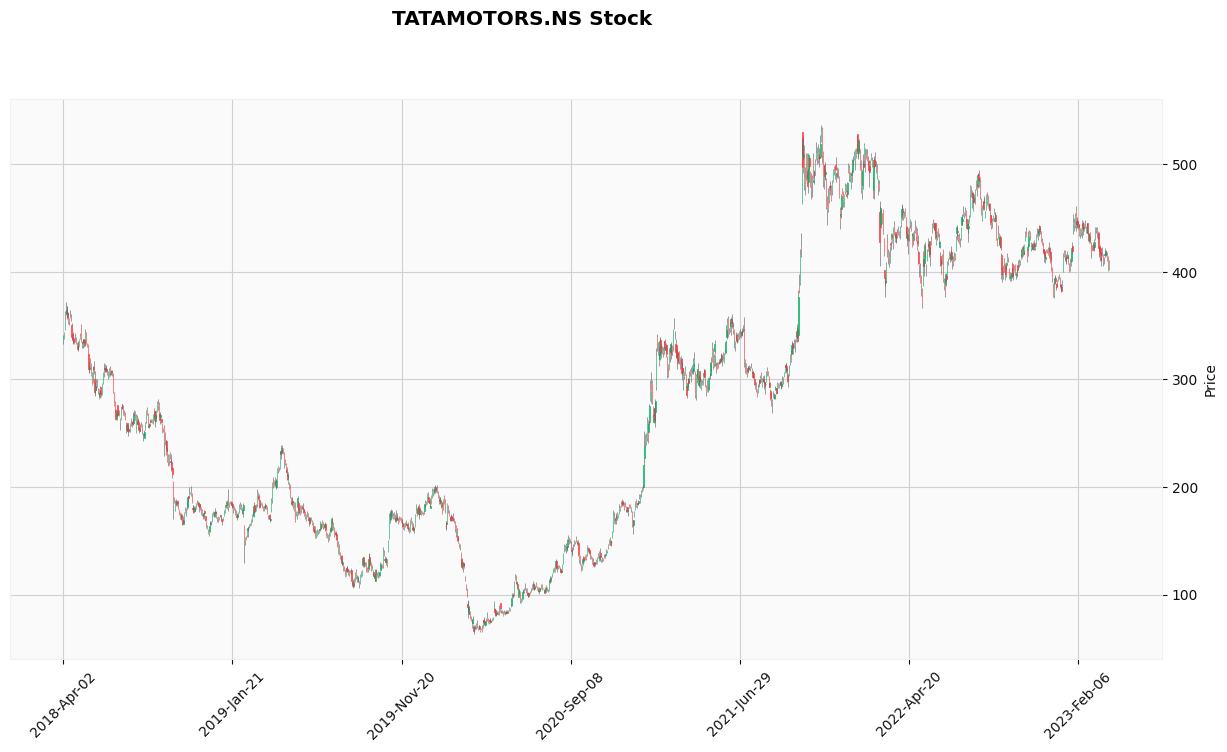

In [5]:
mpf.plot(data, type='candle', title=f'{ticker} Stock', ylabel='Price', style='yahoo',figsize=(16,8))

# **Code for printing buy and sell signals for candlestick patterns**

In [ ]:
# Detect candlestick patterns
patterns = talib.get_function_groups()['Pattern Recognition']
detected_patterns = {}
for pattern in patterns:
    func = getattr(talib, pattern)
    result = func(data['Open'], data['High'], data['Low'], data['Close'])
    detected_patterns[pattern] = result

# Generate buy/sell signals based on breakoff points
buy_details = []
buy_signals = []
sell_details = []
sell_signals = []
for pattern, result in detected_patterns.items():
    pattern_indexes = np.where(result != 0)[0]
    for index in pattern_indexes:
        if result[index] > 0:
            buy_details.append((index, pattern))
            buy_signals.append(index)
        else:
            sell_details.append((index, pattern))
            sell_signals.append(index)

# Print detected patterns and signals
print('Detected patterns:')
for pattern, result in detected_patterns.items():
    pattern_indexes = np.where(result != 0)[0]
    for index in pattern_indexes:
        print(f'{pattern} detected at index {index}')

print('\nBuy signals:')
for index, pattern in buy_details:
    print(f'{pattern} buy signal at index {index}')

print('\nSell signals:')
for index, pattern in sell_details:
    print(f'{pattern} sell signal at index {index}')

Detected patterns:
CDL2CROWS detected at index 556
CDL2CROWS detected at index 922
CDL3BLACKCROWS detected at index 29
CDL3BLACKCROWS detected at index 482
CDL3INSIDE detected at index 113
CDL3INSIDE detected at index 143
CDL3INSIDE detected at index 308
CDL3INSIDE detected at index 481
CDL3INSIDE detected at index 574
CDL3INSIDE detected at index 590
CDL3INSIDE detected at index 649
CDL3INSIDE detected at index 657
CDL3INSIDE detected at index 693
CDL3INSIDE detected at index 763
CDL3INSIDE detected at index 770
CDL3INSIDE detected at index 791
CDL3INSIDE detected at index 831
CDL3INSIDE detected at index 883
CDL3INSIDE detected at index 920
CDL3INSIDE detected at index 942
CDL3INSIDE detected at index 993
CDL3INSIDE detected at index 1020
CDL3INSIDE detected at index 1026
CDL3INSIDE detected at index 1058
CDL3INSIDE detected at index 1061
CDL3INSIDE detected at index 1172
CDL3INSIDE detected at index 1191
CDL3LINESTRIKE detected at index 369
CDL3OUTSIDE detected at index 22
CDL3OUTSI

In [ ]:
print(buy_signals)

[143, 574, 590, 649, 657, 693, 763, 770, 831, 920, 1026, 1061, 1172, 1191, 277, 488, 523, 582, 632, 683, 782, 842, 847, 1066, 26, 35, 68, 75, 83, 86, 96, 111, 147, 172, 176, 190, 191, 193, 208, 213, 222, 225, 246, 253, 256, 273, 300, 306, 325, 351, 369, 375, 384, 385, 387, 421, 430, 449, 454, 509, 515, 530, 538, 563, 570, 574, 576, 579, 581, 613, 649, 650, 657, 675, 686, 693, 694, 705, 716, 738, 745, 746, 765, 781, 784, 798, 821, 831, 850, 852, 853, 858, 859, 861, 873, 881, 895, 896, 910, 920, 927, 1016, 1055, 1061, 1062, 1071, 1072, 1137, 1141, 1182, 1192, 1207, 1219, 1236, 19, 354, 403, 674, 682, 763, 857, 881, 927, 981, 1000, 1018, 1036, 1136, 1207, 14, 18, 23, 31, 41, 51, 56, 65, 70, 78, 80, 84, 94, 95, 104, 110, 112, 118, 121, 127, 135, 139, 144, 150, 158, 159, 165, 170, 185, 186, 197, 207, 209, 219, 220, 221, 224, 233, 234, 237, 259, 275, 282, 290, 294, 301, 332, 339, 349, 356, 357, 360, 365, 376, 382, 388, 389, 395, 397, 400, 408, 417, 426, 438, 441, 452, 465, 488, 491, 513, 516

In [ ]:
print(sell_signals)

[556, 922, 29, 482, 113, 308, 481, 791, 883, 942, 993, 1020, 1058, 369, 22, 72, 137, 241, 296, 359, 393, 443, 536, 714, 759, 797, 829, 880, 898, 1041, 1085, 1094, 1103, 1123, 1126, 1185, 1189, 1212, 1215, 1225, 48, 219, 224, 316, 353, 646, 25, 27, 29, 30, 33, 42, 59, 60, 62, 64, 71, 74, 76, 100, 108, 114, 120, 122, 129, 130, 136, 138, 152, 163, 168, 169, 203, 211, 214, 230, 232, 240, 241, 242, 263, 267, 274, 280, 286, 295, 296, 311, 313, 319, 326, 341, 364, 396, 398, 402, 409, 432, 444, 448, 463, 482, 502, 510, 517, 520, 535, 539, 550, 561, 572, 588, 600, 607, 609, 610, 623, 647, 665, 667, 670, 677, 691, 713, 714, 725, 737, 747, 752, 758, 768, 772, 807, 815, 834, 835, 843, 848, 874, 898, 902, 908, 917, 918, 922, 939, 969, 970, 980, 996, 1014, 1024, 1030, 1031, 1040, 1068, 1085, 1093, 1097, 1103, 1104, 1108, 1114, 1118, 1125, 1128, 1139, 1154, 1158, 1167, 1169, 1170, 1178, 1184, 1188, 1211, 1212, 1215, 1218, 1235, 27, 29, 42, 44, 71, 93, 117, 120, 136, 138, 154, 163, 167, 324, 326, 451,

# **RSI (my roll number is 220085 and 220085%3 = 2::)**

In [ ]:
period = 14 #the period is set as 14 days
profits = [] #to note down the profits as compared to the day before
losses = [] #to note down the losses as compared to the day before
window = []

pre_avg_gain = []
pre_avg_loss = []

output = [['Date','Close','Gain', 'Loss', 'Avg gain', 'Avg loss', 'RSI']]
for i, price in enumerate(data['Close']):
    # keep track of the price for the first period
    # but don't calculate a difference value.
    if i == 0:
        window.append(price)
        output.append([i+1, price, 0, 0, 0, 0, 0])
        continue
    # After the first period, calculate the difference
    # between price and previous price as a rounded value
    difference = round(data['Close'][i] - data['Close'][i - 1], 2)
    # Record positive differences as profits
    if difference > 0:
      profit = difference
      loss = 0
# Record negative differences as losses
    elif difference < 0:
      profit = 0
      loss = abs(difference)
# Record no movements as neutral
    else:
      profit = 0
      loss = 0

# Save gains/losses
    profits.append(profit)
    losses.append(loss)
# Continue to iterate until enough
# gains/losses data is available to
# calculate the initial RS value
    if i < period:
      window.append(price)
      output.append([i+1, price, profit, loss, 0, 0, 0])
      continue
    elif i == period:
      avg_gain = sum(profits)/len(profits)
      avg_loss = sum(losses)/len(losses)
      pre_avg_gain.append(avg_gain)
      pre_avg_loss.append(avg_loss)
      output.append([i+1, price, profit, loss, avg_gain, avg_loss, 0])

    else:
      avg_gain = (pre_avg_gain[i-period-1]*(period - 1) + profit)/period  #to find the average profit over the past period of 14 days
      avg_loss = (pre_avg_loss[i-period-1]*(period - 1) + loss)/period   #to find the average loss over the past period of 14 days
      # Keep in memory
      pre_avg_gain.append(avg_gain)
      pre_avg_loss.append(avg_loss)
      if avg_loss == 0:
        rsi = 100
      else:
        rs = avg_gain/avg_loss
        rsi = 100 - (100 / (1 + rs))
        output.append([i+1, price, profit, loss, avg_gain, avg_loss, rsi])


In [ ]:
window.append(price)
window.pop(0)
profits.pop(0)
losses.pop(0)
# Save Data
output.append([i+1, price, profit, loss, avg_gain, avg_loss, rsi])

In [ ]:
print(pre_avg_gain)

[2.275, 2.1125, 1.9616071428571427, 1.8214923469387754, 1.8092428935860057, 2.155011258329863, 2.2510818827348724, 2.0902903196823814, 1.940983868276497, 1.8666278776853187, 1.7868687435649389, 1.659235261881729, 2.2407184574616053, 2.080667139071491, 1.9320480577092416, 1.7940446250157243, 1.6658985803717439, 1.5576201103451908, 1.778504388177677, 1.6514683604507001, 1.5335063347042215, 2.266827310796777, 2.229911074311293, 2.0706317118604867, 2.3155865895847376, 2.3037589760429706, 2.1392047634684728, 1.9864044232207247, 1.844518392990673, 2.0484813649199105, 1.9021612674256312, 1.7662926054666577, 2.4044145622190394, 2.9290992363462505, 3.044877862321518, 2.8273865864414094, 2.6254304016955947, 2.4807568015744805, 2.303559887176303, 2.1390198952351382, 2.4040899027183427, 2.232369195381318, 2.1121999671397953, 2.061328540915524, 1.9855193594215579, 1.8436965480343037, 1.7120039374604248, 1.5897179419275373, 1.4761666603612846, 1.795726184621193, 1.6674600285768222, 1.744784312249906

In [ ]:
print(output)

[['Date', 'Close', 'Gain', 'Loss', 'Avg gain', 'Avg loss', 'RSI'], [1, 339.1499938964844, 0, 0, 0, 0, 0], [2, 343.1000061035156, 3.95, 0, 0, 0, 0], [3, 355.6000061035156, 12.5, 0, 0, 0, 0], [4, 362.20001220703125, 6.6, 0, 0, 0, 0], [5, 364.1000061035156, 1.9, 0, 0, 0, 0], [6, 358.29998779296875, 0, 5.8, 0, 0, 0], [7, 353.25, 0, 5.05, 0, 0, 0], [8, 355.79998779296875, 2.55, 0, 0, 0, 0], [9, 358.3999938964844, 2.6, 0, 0, 0, 0], [10, 357.04998779296875, 0, 1.35, 0, 0, 0], [11, 339.1499938964844, 0, 17.9, 0, 0, 0], [12, 336.45001220703125, 0, 2.7, 0, 0, 0], [13, 334.79998779296875, 0, 1.65, 0, 0, 0], [14, 334.25, 0, 0.55, 0, 0, 0], [15, 336.0, 1.75, 0, 2.275, 2.4999999999999996, 0], [16, 334.04998779296875, 0, 1.95, 2.1125, 2.4607142857142854, 46.19289340101523], [17, 331.54998779296875, 0, 2.5, 1.9616071428571427, 2.4635204081632653, 44.328827140921796], [18, 328.6000061035156, 0, 2.95, 1.8214923469387754, 2.498268950437318, 42.16650461786361], [19, 330.25, 1.65, 0, 1.8092428935860057, 2.

In [ ]:
len(data['Close'])

1237

# **Adding RSI Value in Dataframe**

In [ ]:
RSI =[]
for i in range(0,len(data['Close'])):
  RSI.append(output[i][6])

print(RSI)
data['RSI'] = RSI
print(data)
print(data['RSI'][0])

['RSI', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46.19289340101523, 44.328827140921796, 42.16650461786361, 43.81726382747677, 50.010345497771084, 52.94998942822394, 49.0864766749535, 46.924972369861806, 47.79867329896143, 48.55862945413268, 45.69311603554425, 55.02904681784174, 47.53134856404915, 45.302334593375974, 40.09535510584337, 32.54262704700619, 32.69433333708304, 37.394699040271824, 32.0547051507548, 28.369594315075645, 38.66847383916326, 40.04523001371233, 31.10716253260125, 35.22424314584515, 36.81387827623348, 36.08205472043456, 33.577064036015486, 30.997543744426082, 34.949820054554095, 34.69935126379485, 33.89088391278047, 42.90743101553323, 49.64669417185593, 52.46652993464782, 52.327812296275496, 50.91436703854894, 51.34981099666848, 49.38401820119367, 47.0930332097042, 51.86218082257486, 48.82394912429589, 49.293143618762194, 50.536291632773214, 51.45184886290146, 37.53518793726297, 31.369789712070627, 28.999093470026267, 26.171362715117183, 31.712580967073336, 30.

**The limits to send buy and sell signals have been set 30 and 70**

In [ ]:
buy_rsi = []
sell_rsi = []
for i in range(16,1236):
  if data['RSI'][i] >= 70:
    sell_rsi.append(i)
  if data['RSI'][i] <= 30:
    buy_rsi.append(i)

print(buy_rsi)
print(sell_rsi)

[35, 62, 63, 68, 75, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 172, 173, 215, 275, 299, 328, 330, 332, 333, 334, 342, 343, 345, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 818, 819, 820, 821, 966, 972, 973, 1016, 1110, 1111, 1112, 1171]
[254, 255, 257, 258, 259, 260, 261, 386, 387, 388, 389, 392, 431, 534, 535, 536, 537, 580, 582, 583, 592, 593, 594, 595, 596, 597, 598, 599, 600, 646, 647, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 701, 702, 703, 704, 705, 706, 708, 711, 786, 867, 868, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 882, 897, 1073, 1082, 1197]


# **Plot for candlestick pattern and RSI values right below it**

In [ ]:
import matplotlib.pyplot as plt

# Import necessary libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])

# Inspect Result
print(fig)

# Create Candlestick chart for price data
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    showlegend=False
), row=1, col=1)

# Make RSI Plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['RSI'],
    line=dict(color='blue', width=2),
    showlegend=False,
), row=2, col=1
)

# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1)
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')

# Customize font, colors, hide range slider
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# update and display
fig.update_layout(layout)
fig.show()

Figure({
    'data': [],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'matches': 'x2', 'showticklabels': False},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.3625, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.2125]}}
})


# **Generating buy and sell signals according to ASCENDING AND DESCENDING TRIANGLE PATTERN**

In [ ]:
def ascending_triangle_pattern(data):
    pattern = (data['High'].rolling(window=3).max() <= data['High']) & (data['Low'].rolling(window=3).min() >= data['Low'])
    asc_tri_pat_indices= np.where(pattern)
    return asc_tri_pat_indices

def descending_triangle_pattern(data):
    pattern = (data['High'].rolling(window=3).min() >= data['High']) & (data['Low'].rolling(window=3).max() <= data['Low'])
    desc_tri_pat_indices = np.where(pattern)[0]
    return desc_tri_pat_indices

print(ascending_triangle_pattern(data))
print(descending_triangle_pattern(data))

(array([  18,   58,  106,  136,  194,  195,  244,  369,  420,  442,  594,
        700,  742,  789,  805,  855,  936,  969,  981, 1040, 1070, 1078,
       1164, 1165, 1197, 1204, 1214]),)
[  50   56  134  156  184  196  227  231  363  377  394  558  692  708
  734  744  755  762  787  888  901  949  968 1076 1077 1203]


In [ ]:
buy = []
sell = []

buy_indices = set(buy_signals[:min(len(buy_signals), len(buy_rsi))]) & set(buy_rsi[:min(len(buy_signals), len(buy_rsi))])
if buy_indices:
  for index in buy_indices:
    buy.append(index)

sell_indices = set(sell_signals[:min(len(sell_signals), len(sell_rsi))]) & set(sell_rsi[:min(len(sell_signals), len(sell_rsi))])
if sell_indices:
  for index in sell_indices:
    sell.append(index)

print(buy)
print(sell)

for i in range(6):
  print(data['Close'][buy[i]])

print('\n')

for i in range(3):
  print(data['Close'][sell[i]])

[35, 68, 488, 75, 172, 143]
[536, 880, 646]
307.70001220703125
270.8500061035156
70.80000305175781
257.95001220703125
158.10000610351562
175.35000610351562


111.4000015258789
479.8999938964844
151.1999969482422


# **Performance based on the signals given by my code**

In [ ]:
amount = 0
shares = 0
price = data['Close']
for i in range(0,1237):
  for j in range(len(buy)):
    if buy[j] == i:
      amount -= 2*price[i]
      print(amount)
  for j in range(len(sell)):
    if sell[j] == i:
      amount += 4*price[i]

print(amount)

-615.4000244140625
-1157.1000366210938
-1673.0000610351562
-2023.7000732421875
-2339.9000854492188
-2481.5000915527344
488.4998779296875
